###Data Preprocessing

In [61]:
import numpy as np
import pandas as pd

df=pd.read_csv("BankNote_Authentication.csv")

In [62]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [63]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [65]:
print("No of Fake bank notes = " + str(len(df[df['class'] == 0])))
print("No of Authentic bank notes = " + str(len(df[df['class'] == 1])))

No of Fake bank notes = 762
No of Authentic bank notes = 610


In [66]:

features=list(df.columns[:-1])
print("Our features :"  )
features

Our features :


['variance', 'skewness', 'curtosis', 'entropy']

In [67]:

X = df[features]
y = df['class']

In [68]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


###EDA with SQL

In [117]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=ecdb77865d9b045f195ae973911282ff5af81ca5b07ac6ee54f75cd0ebee8a47
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [118]:
import pandasql as ps

In [123]:
q1 = """SELECT  count(variance)as "variance of Wavelet Transformed image"
FROM df group by class"""
grouped_df = ps.sqldf(q1, locals())
grouped_df

,variance of Wavelet Transformed image
0,762
1,610


In [124]:
q1 = """SELECT  count(skewness)as "skewness of Wavelet Transformed image"
FROM df group by class"""
grouped_df = ps.sqldf(q1, locals())
grouped_df

,skewness of Wavelet Transformed image
0,762
1,610


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###The sigmoid function used in the Logistic Regression

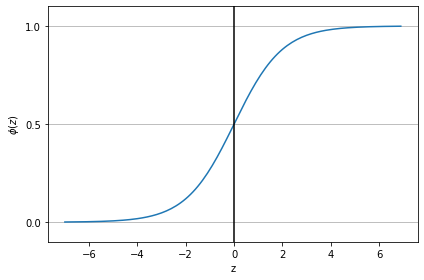

In [71]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

###Learning the weights of the logistic cost function

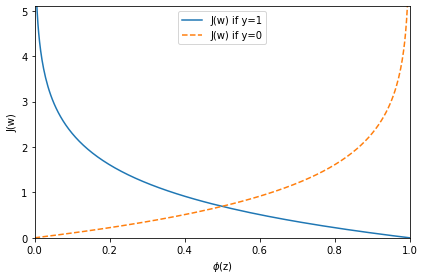

In [72]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

###Training a logistic regression model with scikit-learn
Scikit-learn implements a highly optimized version of logistic regression that also supports multiclass settings off-the-shelf, we will skip the implementation and use the sklearn.linear_model.LogisticRegression class as well as the familiar fit method to train the model on the standardized flower training dataset

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [76]:
y_test.shape
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 8


###Measuring our classifier using Binary classification performance metrics
A variety of metrics exist to evaluate the performance of binary classifiers against trusted labels. The most common metrics are accuracy, precision, recall, F1 measure, and ROC AUC score. All of these measures depend on the concepts of true positives, true negatives, false positives, and false negatives. Positive and negative refer to the classes. True and false denote whether the predicted class is the same as the true class.

For our Banknote classifier, a true positive prediction is when the classifier correctly predicts that a note is authentic. A true negative prediction is when the classifier correctly predicts that a note is fake. A prediction that a fake note is authentic is a false positive prediction, and an authentic note is incorrectly classified as fake is a false negative prediction.

###Confusion Matrix
A confusion matrix, or contingency table, can be used to visualize true and false positives and negatives. The rows of the matrix are the true classes of the instances, and the columns are the predicted classes of the instances:

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


[[224   8]
 [  0 180]]


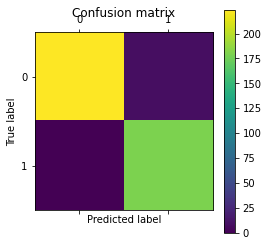

In [78]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

###Accuracy


In [79]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [93]:

lr.predict_proba(X_test_std[0,:].reshape(1, -1))

array([[3.56408585e-06, 9.99996436e-01]])

In [97]:
from sklearn.model_selection import cross_val_score

precisions = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='precision')
print('Precision', np.mean(precisions), precisions)

recalls = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.9887129724208377 [0.96629213 1.         0.97727273 1.         1.        ]
Recalls 0.9883720930232558 [1.         0.95348837 1.         1.         0.98837209]


In [98]:
f1s = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

F1 0.9883410825915362 [0.98285714 0.97619048 0.98850575 1.         0.99415205]


In [99]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc_score(y_test,lr.predict(X_test_std))

0.9827586206896552

###ROC AUC
A Receiver Operating Characteristic, or ROC curve, visualizes a classifier's performance. Unlike accuracy, the ROC curve is insensitive to data sets with unbalanced class proportions; unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold. ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive rate, is the number of false positives divided by the total number of negatives. It is calculated using the following formula:

F = FP / (TN + FP)

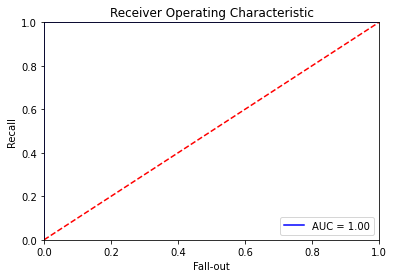

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred = lr.predict_proba(X_test_std)

false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

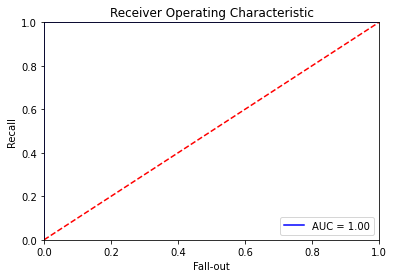

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred = lr.predict_proba(X_test_std)

false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X[['variance','skewness']], y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

###Finding the most important features with forests of trees

Feature ranking:
1. feature 0 - variance (0.502450) 
2. feature 1 - skewness (0.280639) 
3. feature 2 - curtosis (0.153946) 
4. feature 3 - entropy (0.062965) 


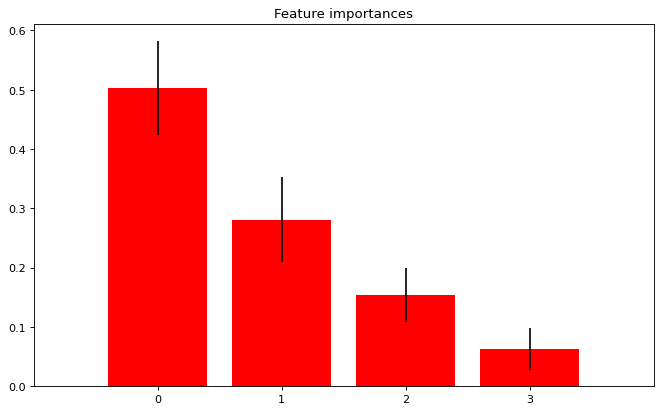

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



####Plotting our model decison regions
Finally, we can plot the decision regions of our newly trained perceptron model and visualize how well it separates the different samples.

In [105]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


KeyError: ignored

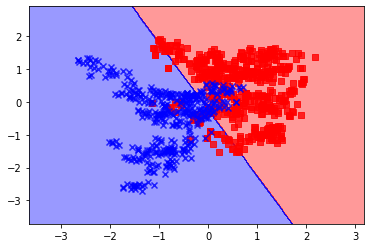

In [110]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train,classifier=lr, test_idx=range(105, 170))
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

###Tackling overfitting via regularization
Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.